# Проект: вариант 2

## Задание 1. 

**A/B–тестирование**

**1.1 Условие**

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

**1.2 Входные данные**

В качестве входных данных Вы имеете 4 csv-файла:

- *groups.csv* - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
- *groups_add.csv* - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
- *active_studs.csv* - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
- *checks.csv* - файл с информацией об оплатах пользователей в дни проведения эксперимента. 


**1.3 Вопросы**

Предлагаем Вам ответить на следующие вопросы:

- На какие метрики Вы смотрите в ходе анализа и почему?
- Имеются ли различия в показателях и с чем они могут быть связаны?
- Являются ли эти различия статистически значимыми?
- Стоит ли запускать новую механику на всех пользователей?

Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

**1.4 Требования к ответу**

При выполнении тестового задания необходимо использовать язык программирования Python. 
В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

## Задание 2.

**SQL**

**2.1 Очень усердные ученики.**

**2.1.1 Условие**

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин за час.

**2.1.2 Задача**

Дана таблица peas:

|Название атрибута|Тип атрибута|Смысловое значение|
|---|---|---|
|st_id|int|ID ученика|
|timest|timestamp|Время решения карточки|
|correct|bool|Правильно ли решена горошина?|
|subject|text|Дисциплина, в которой находится горошина|

Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов за март 2020 года.

NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

**2.2 Оптимизация воронки**

**2.2.2 Задача**

Дана таблицы: peas (см. выше), studs:

| Название атрибута  |Тип атрибута  |Смысловое значение |
| -------------------|--------------|-------------------|
|st_id|int|ID ученика|
|test_grp|text|Метка ученика в данном эксперименте|

и checks:

|Название атрибута|Тип атрибута|Смысловое значение|
| -------------------|--------------|-------------------|
|st_id|int|ID ученика|
|sale_time|timestamp|Время покупки|
|money|int|Цена, по которой приобрели данный курс|
|subject|text|Дисциплина, на которую приобрели полный доступ|

Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:
* ARPU 
* ARPAU 
* CR в покупку 
* СR активного пользователя в покупку 
* CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике.

Все данные находятся в табличном виде в Clickhouse

## Задание 3. 

**Python**

**3.1 Задача**

Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
Реализуйте функцию, которая будет строить графики по получаемым метрикам.

---------------------------------------------

## Задание 1

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import norm
from scipy.stats import chi2_contingency
from tqdm.auto import tqdm
from scipy.stats import shapiro

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Считываем данные
active_studs = pd.read_csv('Проект_2_active_studs.csv')
checks = pd.read_csv('Проект_2_checks.csv', sep=';')
groups = pd.read_csv('Проект_2_groups.csv', sep=';')
group_add = pd.read_csv('Проект_2_group_add.csv')

In [3]:
# Посмотрим на данные. Проверим, есть ли пропуски и повторы.

In [4]:
def print_info(df):
    print('--' * 50)
    print(df.head(3))
    print('--' * 50)
    df.info()
    print('--' * 50)
    print('Пропуски в данных')
    print(df.isna().sum())
    print('--' * 50)
    print('Количество уникальных значений')
    print(df.nunique())
    print('--' * 50)
    print('Полные дубликаты в данных')
    print(df.duplicated().sum())
    print('--' * 50)

In [5]:
print_info(active_studs)

----------------------------------------------------------------------------------------------------
   student_id
0      581585
1     5723133
2     3276743
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB
----------------------------------------------------------------------------------------------------
Пропуски в данных
student_id    0
dtype: int64
----------------------------------------------------------------------------------------------------
Количество уникальных значений
student_id    8341
dtype: int64
----------------------------------------------------------------------------------------------------
Полные дубликаты в данных
0
---------------------------------------

In [6]:
print_info(checks)

----------------------------------------------------------------------------------------------------
   student_id    rev
0        1627  990.0
1        3185  690.0
2       25973  690.0
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB
----------------------------------------------------------------------------------------------------
Пропуски в данных
student_id    0
rev           0
dtype: int64
----------------------------------------------------------------------------------------------------
Количество уникальных значений
student_id    541
rev            39
dtype: int64
---------------------------------------------------

In [7]:
print_info(groups)

----------------------------------------------------------------------------------------------------
     id grp
0  1489   B
1  1627   A
2  1768   B
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
----------------------------------------------------------------------------------------------------
Пропуски в данных
id     0
grp    0
dtype: int64
----------------------------------------------------------------------------------------------------
Количество уникальных значений
id     74484
grp        2
dtype: int64
----------------------------------------------------------------------------------------------------
Полные дубликаты в данных


In [8]:
print_info(group_add)

----------------------------------------------------------------------------------------------------
        id grp
0  5694584   B
1  5694830   B
2  5695057   B
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB
----------------------------------------------------------------------------------------------------
Пропуски в данных
id     0
grp    0
dtype: int64
----------------------------------------------------------------------------------------------------
Количество уникальных значений
id     92
grp     2
dtype: int64
----------------------------------------------------------------------------------------------------
Полные дубликаты в данных


Посмотрим на размер тестовой и контрольной группы

А – контроль, B – целевая группа

In [9]:
groups.grp.value_counts()

B    59813
A    14671
Name: grp, dtype: int64

In [10]:
group_add.grp.value_counts()

B    70
A    22
Name: grp, dtype: int64

Размер тестовой группы превышает размер контрольной группы. 
Обычно в датасетах все наоборот - нововведения тестируют на меньшем количестве пользоваталей.

In [11]:
checks.merge(active_studs).shape

(392, 2)

In [12]:
checks.merge(groups, left_on='student_id', right_on='id').shape

(540, 4)

Из объединений таблиц выше видим, что в таблице groups больше активных пользоваталей, чем в active_studs.

Возможно это тоже какая-то ошибка. Не все пользователи из checks(совершили покупку) вошли в таблицу active_studs(зашли на платформу).


Далее при расчете метрик мы будем исходить из того, что в таблице active_studs содержится информация о пользователях, которые зашли на платформу в дни проведения эксперимента

------
Для имеющихся данных будем смотреть и сравнивать следющие показатели:

* __CR в контрольной и тестовой группе__
* __средний чек в контрольной и тестовой группе__

К таблице active_studs с данными активных пользователей добавим информацию groups о принадлежности к тестовой и контрольной группе. Используем inner join, чтобы остались только id из контрольной и тестовой групп.

Далее добавим информацию о совершенных покупках checks. 

Если не было покупок, то заполним пропуски нулями.

In [13]:
df_for_metrics = active_studs.merge(groups, left_on='student_id', right_on='id')[['id', 'grp']]\
    .merge(checks, how='left', left_on='id', right_on='student_id').drop(columns='student_id').fillna(0)

Добавим колонку с информацией о том, совершил ли пользователь покупку или нет.

* 1 - совершил покупку
* 0 - не делал покупку

In [14]:
df_for_metrics['purchase'] = np.where(df_for_metrics.rev > 0, 1, 0)

In [15]:
df_for_metrics

,id,grp,rev,purchase
0,581585,A,0.0,0
1,3276743,B,0.0,0
2,4238589,A,0.0,0
3,4475369,B,0.0,0
4,5481015,B,0.0,0
...,...,...,...,...
8323,1794344,B,0.0,0
8324,296883,B,0.0,0
8325,3598448,B,0.0,0
8326,3610547,B,290.0,1


In [16]:
# Создадим датафрейм с метриками: конверсия, средняя выручка на покупателя, средняя выручка на платящего покупателя

metrics = df_for_metrics.groupby('grp', as_index=False) \
    .agg({'id': 'count', 'purchase': ['sum', 'mean'], 'rev': ['sum', 'mean']})
metrics.columns = ['grp', 'count_of_users', 'paying_users', 'cr', 'revenue', 'ARPU']
metrics['cr'] = metrics['cr'].mul(100)
metrics['ARPPU'] = metrics['revenue'] / metrics['paying_users']

In [17]:
metrics

,grp,count_of_users,paying_users,cr,revenue,ARPU,ARPPU
0,A,1535,78,5.081433,72820.0000,47.439739,933.589744
1,B,6793,313,4.607684,393074.0035,57.864567,1255.827487


------------

1) C помощью критерия хи квадрат проверим, есть ли зависимости совершения покупок и группы пользователей (наличие покупателя в тестовой и контрольной группах).

2) Проверим являются ли отличия в величине средней покупки статистически значимыми

--------

In [18]:
df_for_metrics['purchase'] = np.where(df_for_metrics.rev > 0, 'buy', 'not_buy')

In [19]:
df_for_metrics.head()

,id,grp,rev,purchase
0,581585,A,0.0,not_buy
1,3276743,B,0.0,not_buy
2,4238589,A,0.0,not_buy
3,4475369,B,0.0,not_buy
4,5481015,B,0.0,not_buy


In [20]:
pd.crosstab(df_for_metrics.grp, df_for_metrics.purchase)

purchase,buy,not_buy
grp,,
A,78,1457
B,313,6480


In [21]:
df_for_chi2_contingency = pd.crosstab(df_for_metrics.grp, df_for_metrics.purchase)

In [22]:
stat, p, dof, expected = chi2_contingency(df_for_chi2_contingency)

In [23]:
stat, p, dof, expected

(0.526607176998989,
 0.46803677583199144,
 1,
 array([[  72.06832373, 1462.93167627],
        [ 318.93167627, 6474.06832373]]))

In [24]:
p

0.46803677583199144

p-value имеет значение 0.468.

Это значит, что мы принимаем нулевую гипотезу о назависимости совершения покупок и нахождения в группе.

__Вывод - новая механика оплаты услуг на сайте не влияет на конверсию, различие конверсии в группах не является статистически значимым.__

In [25]:
# Аналогично можно сделать с помощью пакета pingouin
import pingouin as pg
expected, observed, stats = pg.chi2_independence(df_for_metrics, x='grp', y='purchase')

In [26]:
expected

purchase,buy,not_buy
grp,,
A,72.068324,1462.931676
B,318.931676,6474.068324


In [27]:
observed

purchase,buy,not_buy
grp,,
A,77.5,1457.5
B,313.5,6479.5


In [28]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.526607,1.0,0.468037,0.007952,0.112168
1,cressie-read,0.666667,0.523446,1.0,0.469375,0.007928,0.111786
2,log-likelihood,0.000000,0.517247,1.0,0.472019,0.007881,0.111037
3,freeman-tukey,-0.500000,0.512702,1.0,0.473971,0.007846,0.110488
4,mod-log-likelihood,-1.000000,0.508246,1.0,0.475899,0.007812,0.109950
5,neyman,-2.000000,0.499590,1.0,0.479680,0.007745,0.108905


/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


-------------------

Далее посмотрим, как влияет способ оплаты на средний размер покупки у платящего пользователя ARPPU

In [29]:
#  В отдельный df отберем пользователей, которые совершили покупку
# А – контроль, B – целевая группа
df_A_B = df_for_metrics[df_for_metrics.purchase == 'buy']

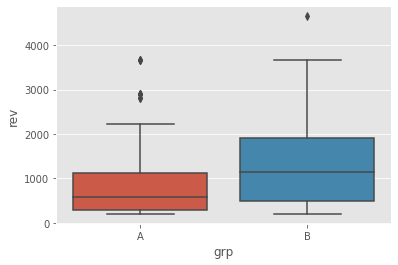

In [30]:
sns.boxplot(x="grp", y="rev", data=df_A_B)

In [31]:
#  В отдельные df отберем пользователей из группы А и группы В, которые совершили покупку.
df_A = df_for_metrics[(df_for_metrics.grp == 'A') & (df_for_metrics.purchase == 'buy')]
df_B = df_for_metrics[(df_for_metrics.grp == 'B') & (df_for_metrics.purchase == 'buy')]

In [32]:
df_A.rev.describe()

count      78.000000
mean      933.589744
std       919.932711
min       199.000000
25%       290.000000
50%       585.000000
75%      1114.750000
max      3660.000000
Name: rev, dtype: float64

In [33]:
df_B.rev.describe()

count     313.000000
mean     1255.827487
std       791.293377
min       199.000000
25%       489.000000
50%      1140.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64

In [34]:
df_A_B.groupby('grp').rev.agg(['mean', 'median'])

,mean,median
grp,,
A,933.589744,585.0
B,1255.827487,1140.0


--------------
Посмотрим на гистограммы распредлений величины чеков в контрольной и тестовой группе

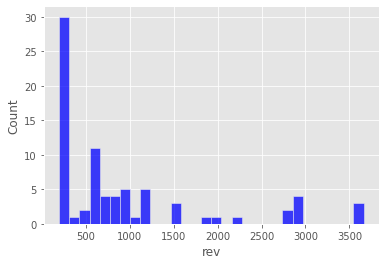

In [35]:
sns.histplot(data=df_A, x='rev', color='b', bins=30)

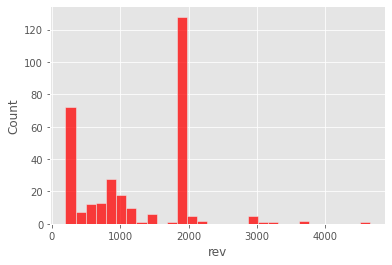

In [36]:
sns.histplot(data=df_B, x='rev', color='r', bins=30)

------
Гистограммы чеков не похожи на гистограммы нормальных распределений.

Проверим распределения на нормальность с помощью теста Шапиро-Уилка.

In [39]:
shapiro(df_A.rev)

ShapiroResult(statistic=0.7353236079216003, pvalue=1.4986822893803264e-10)

In [40]:
shapiro(df_B.rev)

ShapiroResult(statistic=0.8551987409591675, pvalue=1.756778758085431e-16)

In [43]:
pg.normality(df_A.rev)

,W,pval,normal
rev,0.735324,1.498682e-10,False


In [44]:
pg.normality(df_B.rev)

,W,pval,normal
rev,0.855199,1.756779e-16,False


-----
p-value проведенных тестов меньше 0.05. Это показываем показывает нам, что мы отклоняем гипотезу о том, что распределения чеков являются нормальными.

Соответственно нельзя применять t test для проверки гипотезы о равенстве средних.

Гипотезу равенстве средний чеков в группах мы будем проверять с помощью метода bootstrap.

----

In [47]:
# Функцию бутстрап я взял из соответствующего урока
def get_bootstrap(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it=1000,  # количество бутстрэп-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace=True  # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len,  # чтобы сохранить дисперсию, берем такой же размер выборки
            replace=True
        ).values
        
        boot_data.append(statistic(samples_1 - samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x=0, 
        loc=np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_2 = norm.cdf(
        x=0, 
        loc=-np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins=50)
    
    plt.style.use('ggplot')
    plt.vlines(quants, ymin=0, ymax=50, linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {  # "boot_data": boot_data, 
        "quants": quants,
        "p_value": p_value}

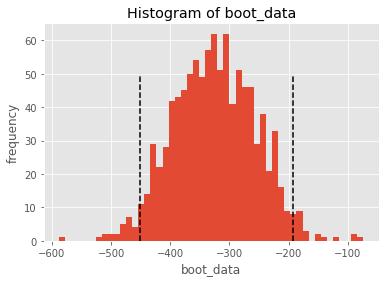

{'quants':                 0
 0.025 -451.616068
 0.975 -192.156560,
 'p_value': 2.690784321041717e-06}

In [48]:
get_bootstrap(
    df_A.rev,  # числовые значения первой выборки
    df_B.rev,  # числовые значения второй выборки
    boot_it=1000,  # количество бутстрэп-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
)

__p_value < 0.05__

__0__ не попадает в доверительный интервал.

Мы отклоняем нулевую гипотезу о равенстве средних чеков у платящих пользователей в группах. Различия являются статистически значимыми.

__Вывод - запуск новой механики приводит увеличению ARPPU. Новую механику оплаты можно раскатать на всех пользователей__

--------------------

In [49]:
[len(df_A.rev), len(df_B.rev)]

[78, 313]

In [50]:
# А – контроль, B – целевая группа
boot_data = []
n = 10000
for i in range(n):
    samples_A = df_A.rev.sample(313, replace=True).values
    samples_B = df_B.rev.sample(313, replace=True).values
    boot_data.append(np.mean(samples_B-samples_A))
p = (np.array(boot_data) <= 0).sum()*2/n
print(p)

0.0


(array([1.000e+00, 2.000e+00, 1.500e+01, 1.400e+01, 3.800e+01, 4.400e+01,
        1.090e+02, 2.010e+02, 3.040e+02, 4.450e+02, 6.350e+02, 7.990e+02,
        9.220e+02, 1.094e+03, 1.067e+03, 1.049e+03, 9.440e+02, 7.630e+02,
        5.960e+02, 3.850e+02, 2.390e+02, 1.660e+02, 9.200e+01, 4.300e+01,
        2.200e+01, 6.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 49.08946613,  68.07114889,  87.05283165, 106.03451441,
        125.01619717, 143.99787993, 162.97956268, 181.96124544,
        200.9429282 , 219.92461096, 238.90629372, 257.88797647,
        276.86965923, 295.85134199, 314.83302475, 333.81470751,
        352.79639027, 371.77807302, 390.75975578, 409.74143854,
        428.7231213 , 447.70480406, 466.68648682, 485.66816957,
        504.64985233, 523.63153509, 542.61321785, 561.59490061,
        580.57658337, 599.55826612, 618.53994888]),
 <a list of 30 Patch objects>)

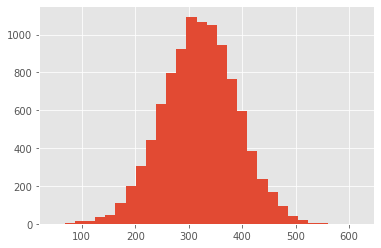

In [51]:
plt.hist(boot_data, bins=30)

In [52]:
np.percentile(np.array(boot_data),[2.5, 97.5])

array([185.08068045, 455.45983887])

In [53]:
norm.cdf(x=0, loc=np.mean(boot_data), scale=np.std(boot_data))

1.6810076876173544e-06

## Задание 2

In [54]:
import pandahouse as ph
import pandas as pd

In [55]:
# user и password были удалены
connection = dict(database='test',
                  host='https://clickhouse.lab.karpov.courses',
                  user='*****',
                  password='*****')

### 2.1 Очень усердные ученики

In [56]:
# Запрос для clickhouse
query_2_1 = """
SELECT COUNT(st_id) as successful_students
FROM
    (SELECT st_id, COUNT(st_id) as num, toStartOfMonth(timest) as month
    FROM default.peas
    WHERE correct = 1 AND month = '2020-03-01'
    GROUP BY st_id, month)
WHERE num >= 20
"""
df = ph.read_clickhouse(query_2_1, connection=connection)
df

,successful_students
0,0


In [57]:
# Запрос для Postgresql

'''
SELECT COUNT(t.st_id) as successful_students
FROM
    (SELECT st_id, COUNT(st_id) as num, to_char(timest, 'YYYY-MM') as month
    FROM peas
    WHERE correct = 1 and to_char(timest, 'YYYY-MM')='2022-03'
    GROUP BY st_id, month) t
WHERE t.num >= 20 
'''

"\nSELECT COUNT(t.st_id) as successful_students\nFROM\n    (SELECT st_id, COUNT(st_id) as num, to_char(timest, 'YYYY-MM') as month\n    FROM peas\n    WHERE correct = 1 and to_char(timest, 'YYYY-MM')='2022-03'\n    GROUP BY st_id, month) t\nWHERE t.num >= 20 \n"

### 2.2 Оптимизация воронки

In [58]:
# в clickhouse на сайте clickhouse.lab.karpov.courses отсутстуют необходимые таблицы.

# Запрос для Postgresql
'''
SELECT test_grp,
        SUM(revenue)/count(st_id) AS ARPU,
        SUM(revenue*active)/sum(active) as ARPAU,
        CAST(SUM(made_purchase) AS decimal)/CAST(count(st_id) AS decimal) as CR,
        CAST(SUM(made_purchase*active) AS decimal)/CAST(sum(active) AS decimal) as CR_active,
        CAST(SUM(made_purchase_math*active_in_math) AS decimal)/CAST(sum(active_in_math) AS decimal) as CR_active_in_math
FROM (
    SELECT st.st_id,
         st.test_grp,
         CASE WHEN made_purchase.revenue is null THEN 0 ELSE made_purchase.revenue END as revenue,
         CASE WHEN active.active is null THEN 0 ELSE 1 END AS active,
         CASE WHEN active_in_math.active_in_math is null THEN 0 ELSE 1 END AS active_in_math,
         CASE WHEN made_purchase.made_purchase is null THEN 0 ELSE 1 END AS made_purchase,
         CASE WHEN made_purchase_math.made_purchase_math is null THEN 0 ELSE 1 END AS made_purchase_math
    FROM studs as st
    LEFT JOIN (SELECT DISTINCT st_id as active
                FROM peas
                GROUP BY st_id, to_char(timest, 'YYYY-MM')
                HAVING SUM(correct) >=20) as active ON st.st_id=active.active
    LEFT JOIN (SELECT DISTINCT st_id as active_in_math
                FROM peas
                WHERE subject='math'
                GROUP BY st_id, to_char(timest, 'YYYY-MM')
                HAVING SUM(correct) >=20) as active_in_math ON st.st_id=active_in_math.active_in_math
    LEFT JOIN (SELECT st_id as made_purchase, SUM(money) AS revenue 
                FROM checks GROUP BY st_id) as made_purchase ON st.st_id=made_purchase.made_purchase
    LEFT JOIN (SELECT DISTINCT st_id as made_purchase_math
                FROM checks
                WHERE subject='math') as made_purchase_math ON st.st_id=made_purchase_math.made_purchase_math
        ) as t
GROUP BY test_grp
'''

"\nSELECT test_grp,\n        SUM(revenue)/count(st_id) AS ARPU,\n        SUM(revenue*active)/sum(active) as ARPAU,\n        CAST(SUM(made_purchase) AS decimal)/CAST(count(st_id) AS decimal) as CR,\n        CAST(SUM(made_purchase*active) AS decimal)/CAST(sum(active) AS decimal) as CR_active,\n        CAST(SUM(made_purchase_math*active_in_math) AS decimal)/CAST(sum(active_in_math) AS decimal) as CR_active_in_math\nFROM (\n    SELECT st.st_id,\n         st.test_grp,\n         CASE WHEN made_purchase.revenue is null THEN 0 ELSE made_purchase.revenue END as revenue,\n         CASE WHEN active.active is null THEN 0 ELSE 1 END AS active,\n         CASE WHEN active_in_math.active_in_math is null THEN 0 ELSE 1 END AS active_in_math,\n         CASE WHEN made_purchase.made_purchase is null THEN 0 ELSE 1 END AS made_purchase,\n         CASE WHEN made_purchase_math.made_purchase_math is null THEN 0 ELSE 1 END AS made_purchase_math\n    FROM studs as st\n    LEFT JOIN (SELECT DISTINCT st_id as activ

In [59]:
# Запрос для clickhouse
query_2_2 = '''
SELECT test_grp,
        SUM(revenue)/count(st_id) AS ARPU,
        SUM(revenue*active)/sum(active) as ARPAU,
        SUM(made_purchase)/count(st_id) as CR,
        SUM(made_purchase*active)/sum(active) as CR_active,
        SUM(made_purchase_math*active_in_math)/sum(active_in_math) as CR_active_in_math
FROM (
    SELECT st.st_id as st_id,
        st.test_grp as test_grp,
        CASE WHEN made_purchase.revenue is null THEN 0 ELSE made_purchase.revenue END as revenue,
        CASE WHEN active.active is null THEN 0 ELSE 1 END AS active,
        CASE WHEN active_in_math.active_in_math is null THEN 0 ELSE 1 END AS active_in_math,
        CASE WHEN made_purchase.made_purchase is null THEN 0 ELSE 1 END AS made_purchase,
        CASE WHEN made_purchase_math.made_purchase_math is null THEN 0 ELSE 1 END AS made_purchase_math
    FROM studs as st
    LEFT JOIN (SELECT DISTINCT st_id as active
                FROM default.peas
                GROUP BY st_id, toStartOfMonth(timest)
                HAVING SUM(correct)>=20) as active ON st.st_id=active.active
    LEFT JOIN (SELECT DISTINCT st_id as active_in_math
                FROM default.peas
                WHERE subject='math'
                GROUP BY st_id, toStartOfMonth(timest)
                HAVING SUM(correct) >=20) as active_in_math ON st.st_id=active_in_math.active_in_math
    LEFT JOIN (SELECT st_id as made_purchase, SUM(money) AS revenue 
                FROM default.final_project_check GROUP BY st_id) as made_purchase ON st.st_id=made_purchase.made_purchase
    LEFT JOIN (SELECT DISTINCT st_id as made_purchase_math
                FROM default.final_project_check WHERE subject='Math') as made_purchase_math ON st.st_id=made_purchase_math.made_purchase_math
    )
GROUP BY test_grp
 
'''
df = ph.read_clickhouse(query_2_2, connection=connection)
df

,test_grp,ARPU,ARPAU,CR,CR_active,CR_active_in_math
0,new,127450.980392,127450.980392,1.0,1.0,1.0
1,old,140918.367347,140918.367347,1.0,1.0,1.0


In [60]:
#  Запрос для clickhouse. Названия таблиц peas, studs, checks
'''
SELECT test_grp,
        SUM(revenue)/count(st_id) AS ARPU,
        SUM(revenue*active)/sum(active) as ARPAU,
        SUM(made_purchase)/count(st_id) as CR,
        SUM(made_purchase*active)/sum(active) as CR_active,
        SUM(made_purchase_math*active_in_math)/sum(active_in_math) as CR_active_in_math
FROM (
    SELECT st.st_id as st_id,
        st.test_grp as test_grp,
        CASE WHEN made_purchase.revenue is null THEN 0 ELSE made_purchase.revenue END as revenue,
        CASE WHEN active.active is null THEN 0 ELSE 1 END AS active,
        CASE WHEN active_in_math.active_in_math is null THEN 0 ELSE 1 END AS active_in_math,
        CASE WHEN made_purchase.made_purchase is null THEN 0 ELSE 1 END AS made_purchase,
        CASE WHEN made_purchase_math.made_purchase_math is null THEN 0 ELSE 1 END AS made_purchase_math
    FROM studs as st
    LEFT JOIN (SELECT DISTINCT st_id as active
                FROM peas
                GROUP BY st_id, toStartOfMonth(timest)
                HAVING SUM(correct)>=20) as active ON st.st_id=active.active
    LEFT JOIN (SELECT DISTINCT st_id as active_in_math
                FROM peas
                WHERE subject='math'
                GROUP BY st_id, toStartOfMonth(timest)
                HAVING SUM(correct) >=20) as active_in_math ON st.st_id=active_in_math.active_in_math
    LEFT JOIN (SELECT st_id as made_purchase, SUM(money) AS revenue 
                FROM checks GROUP BY st_id) as made_purchase ON st.st_id=made_purchase.made_purchase
    LEFT JOIN (SELECT DISTINCT st_id as made_purchase_math
                FROM checks WHERE subject='Math') as made_purchase_math ON st.st_id=made_purchase_math.made_purchase_math
    )
GROUP BY test_grp
 
'''

"\nSELECT test_grp,\n        SUM(revenue)/count(st_id) AS ARPU,\n        SUM(revenue*active)/sum(active) as ARPAU,\n        SUM(made_purchase)/count(st_id) as CR,\n        SUM(made_purchase*active)/sum(active) as CR_active,\n        SUM(made_purchase_math*active_in_math)/sum(active_in_math) as CR_active_in_math\nFROM (\n    SELECT st.st_id as st_id,\n        st.test_grp as test_grp,\n        CASE WHEN made_purchase.revenue is null THEN 0 ELSE made_purchase.revenue END as revenue,\n        CASE WHEN active.active is null THEN 0 ELSE 1 END AS active,\n        CASE WHEN active_in_math.active_in_math is null THEN 0 ELSE 1 END AS active_in_math,\n        CASE WHEN made_purchase.made_purchase is null THEN 0 ELSE 1 END AS made_purchase,\n        CASE WHEN made_purchase_math.made_purchase_math is null THEN 0 ELSE 1 END AS made_purchase_math\n    FROM studs as st\n    LEFT JOIN (SELECT DISTINCT st_id as active\n                FROM peas\n                GROUP BY st_id, toStartOfMonth(timest)\n 

## Задание 3

3.1 Задача

Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики. 

Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [61]:
active_studs = pd.read_csv('Проект_2_active_studs.csv')
checks = pd.read_csv('Проект_2_checks.csv', sep=';')
groups = pd.read_csv('Проект_2_groups.csv', sep=';')
group_add = pd.read_csv('Проект_2_group_add.csv')

In [62]:
def recalculate_metrics(groups, group_add, active_studs, checks):
    '''Пересчет основных метрик при добавлении новых данных о тестовой и контрольной группах'''
    group_add.columns = groups.columns
    groups = pd.concat([groups, group_add])
    df_for_metrics = active_studs.merge(groups, left_on='student_id', right_on='id')[['id', 'grp']]\
        .merge(checks, how='left', left_on='id', right_on='student_id').drop(columns='student_id').fillna(0)
    df_for_metrics['purchase'] = np.where(df_for_metrics.rev > 0, 1, 0)
    metrics = df_for_metrics.groupby('grp', as_index=False) \
        .agg({'id': 'count', 'purchase': ['sum', 'mean'], 'rev': ['sum', 'mean']})
    metrics.columns = ['grp', 'count_of_users', 'paying_users', 'cr', 'revenue', 'ARPU']
    metrics['cr'] = metrics['cr'].mul(100)
    metrics['ARPPU'] = metrics['revenue'] / metrics['paying_users']
    return metrics

In [63]:
recalculate_metrics = recalculate_metrics(groups, group_add, active_studs, checks)

In [64]:
recalculate_metrics

,grp,count_of_users,paying_users,cr,revenue,ARPU,ARPPU
0,A,1538,78,5.071521,72820.0000,47.347204,933.589744
1,B,6803,314,4.615611,394974.0035,58.058798,1257.878992


In [65]:
def print_metrics(metrics):
    '''Построение графиков основных метрик'''
    sns.barplot(x="grp", y="cr", data=metrics)
    plt.title("CR")
    plt.xlabel("Группа")
    plt.ylabel("")
    plt.show()
    sns.barplot(x="grp", y="ARPU", data=metrics)
    plt.title("ARPU")
    plt.xlabel("Группа")
    plt.ylabel("")
    plt.show()
    sns.barplot(x="grp", y="ARPPU", data=metrics)
    plt.title("ARPPU")
    plt.xlabel("Группа")
    plt.ylabel("")
    plt.show()

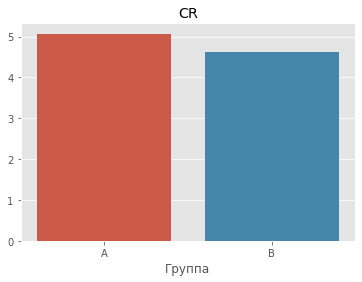

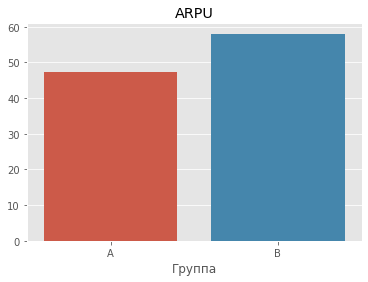

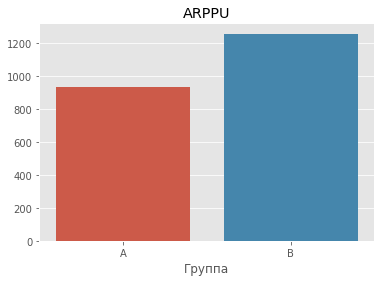

In [66]:
print_metrics(recalculate_metrics)